# Cycle

#### Data Scientists
#### Machine Learning Engineers
#### Data Analysts
#### Data Engineers

# Data Preparation Process

Data Preparation Challenges:
* Lack of necessary data,'
* No clear picture of the data available
* Data that's not ready for use
* Incompatible data formats
* Messy data
* Unbalanced data

# Data Collection

In [119]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

cardata = pd.read_csv(url, header=None)

cardata.columns = headers

cardata.loc[cardata["highway-mpg"]==22,"price"]
cardata.loc[cardata['price']=="?"]
cardata['price']=cardata['price'].replace("?",np.nan)

In [120]:
cardata.loc[cardata['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


.

#### Backup

In [121]:
df = cardata.copy()

.

.

# DATA WRANGLING & DATA PREPROCESSING

Data preprocessing is a subset of data wrangling. Data preprocessing focuses specifically on preparing the data for analysis or modeling, while data wrangling encompasses a wider range of tasks involved in preparing and manipulating data to make it suitable for analysis or modeling purposes.

What to do when you encounter missing values in your data. When no data value is stored for feature for a particular observation, we say this feature has a missing value. Usually missing value in data set appears as question mark and a zero or just a blank cell.
There are many ways to deal with missing values and this is regardless of whatever tool you use.
Each situation is different and should be judged differently.

#### MISSING VALUES

##### FOR CONTINUOUS DATA

1. Check if the person or group that collected the data can go back and find what the actual value should be.
2. ANother possibility is just to remove the data where the missing value is found.
-- When you drop data you could either drop the whole variable or just the single data entry with the missing value. If you don't have a lot of observations with missing data, usually dropping the particular entry is the best. If you're removing data, you want to look to do something that has least amount of impact.
3. Replacing data is better since no data is wasted.
-- However, it is less accurate since we need to replace missing data with a guess of what the data should be.
    One standard for placement technique is to replace missing values by the average value of the entire variable.
    Example: Suppose we have some entries that have missing values for the normalized losses column and the column average for entries with data is 4500. While there is no way for us to get an accurate guess of what the missing value is under the normalized losses column should have been, you can approximate their values using the average value of the column 4500.
    
   


##### FOR CATEGORICAL DATA

But what if the values cannot be averaged as with Categorical Variables?

3. For a variable like fuel type, there isn't average fuel type since the variable values are not numbers. In this case, one possibility is to try using the MODE, the most common like gasoline.

4. Finally, sometimes we may find another way to guess the missing data. This is usually because the data gathered may knows something additional about the missing data.
-- For example, he may know that the missing values tend to be old cars and the normalized losses of old cars are significantly higher than the average vehicle.

5. And of course, in some cases you may simply want to leave the missing data as missing data. For one reason or another, it may be useful to keep that observation even if some features are missing.


To remove data that contains missing values Panda's library has a built-in method called dropna

In [122]:
df['price'].isna().sum()

4

.

### LOCATING,REPLACING,DROPPING ANY VALUES

In [123]:
df.loc[(df['price'].isna()) | ~(df['normalized-losses']=='?')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [124]:
df.loc[(df['highway-mpg']==22) & (df['price'].isna())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


we have to remove the cars, the rows, that don't have a listed price. It can simply be done in one line of code using dataframe.dropna. Setting the argument in place to true, allows the modification to be done on the data set directly. In place equals true, just writes the result back into the data frame. To modify the data frame, you have to set the parameter in place equal to true.
SYNTAX:
df.dropna(subset=["price"], axis=0, inplace=True)

axis=0 --Drops the entire row
axis=1 --Drops the entire column

df2.dropna(inplace=True)

This is equivalent to this line of code. Don't forget that this line of code does not change the data frame but is a good way to make sure that you are performing the correct operation.

SYNTAX: df.dropna(subset=["price"], axis=0)
    

.

In [125]:
df.dropna(subset=['price'], axis=0, inplace=True)

.

#Replace missing values:

Assume we want to replace the missing values of the variable normalized-losses by the mean value of the variable.

In [126]:
df.loc[:,['normalized-losses','make']]

,normalized-losses,make
0,?,alfa-romero
1,?,alfa-romero
2,?,alfa-romero
3,164,audi
4,164,audi
...,...,...
200,95,volvo
201,95,volvo
202,95,volvo
203,95,volvo


In [127]:
con=df.copy()
con.loc[con['normalized-losses']=='?']
(con['normalized-losses']=='?').dtype
con['normalized-losses'].replace("?", np.nan, inplace=True)
con['normalized-losses']=pd.to_numeric(con['normalized-losses'])
con['normalized-losses'].dtype

dtype('float64')

In [128]:
df['normalized-losses'] = con['normalized-losses'].copy()

In [129]:
df['normalized-losses'].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64>

In [130]:
mean = df['normalized-losses'].mean()
mean

122.0

In [131]:
df['normalized-losses'].replace(np.nan, mean)  # We can choose inplace=True to make the changes directly to the dataset permanently.

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64

In [132]:
(df['price']==np.nan).sum()

0

.

# Data Formatting

- Data are usually collected from different sources and stored in different formats.
- Bringing data into a common standard of expression allows users to make meaningful comparison.

In [133]:
city = {"city": ['NY','New York','N.Y.','N.Y.']}
city_df = pd.DataFrame(city)

In [134]:
city_df

,city
0,NY
1,New York
2,N.Y.
3,N.Y.


In [135]:
city_df.columns

Index(['city'], dtype='object')

#### Apply calculations to an entire column
Convert "mpg" to "L/100km" in Car dataset.

In [136]:
df.loc[:,['city-mpg','price']]

,city-mpg,price
0,21,13495
1,21,16500
2,19,16500
3,24,13950
4,18,17450
...,...,...
200,23,16845
201,19,19045
202,18,21485
203,26,22470


In [268]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470


In [266]:
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

KeyError: 'city-mpg'

In [138]:
df['city-L/100km']
df.head(10)  # Can choose round() function for digits after decimal.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,13.823529,20,23875
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,10.217391,29,16430


#### Incorrect Data types

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Sometimes the wrong data types are assigned to features. 

In [140]:
df['price'].tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

In [141]:
# As we can see the data type is object

In [142]:
df['price'].dtypes
df['price']=df['price'].astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

.

# Data Normalization

Process of transforming the data in order to bring it into a specific range or format to make it easy to analyze, compare and understand.
- It is common preprocessing step in Data Analysis and Machine Learning.
- Normalization is performed to eliminate the effect of scale and magnitude differences in different variables to ensure that all the features have equal importance in the analysis.
- It involves rescaling the data values to a common range, typically between o and 1, or -1 and 1, or any other range that is meaningful for the particular data.

As you can see the range of length and width/height are different 

Let's take a look at this example:

In [143]:
dataagenorm={"age":[20,30,40],
            "income":[100000,20000,500000]}
dfage=pd.DataFrame(dataagenorm)
dfage

,age,income
0,20,100000
1,30,20000
2,40,500000


Not-normalized:
- 'age' & 'income' are in different range.
- hard to compare
- 'income' will influence the result more


As  we can see the range of age is 10-100, while the income is about 1000 times larger than age. So these two features are in two different ranges.


When we do analysis like Linear Regression, the attribute income will intrinsically influence the result more due to its larger value. But this doesn't necessarily mean it is more important as a predictor. So, the nature of the data biases the linear regression model to weigh income more heavily than age.
To avoid this, we can normalize these two variables into values that ranges from zero(0) to one(1).

##### Simple Feature Scaling
Just divides each value by the maximum value for that feature. This makes the new values range between zero and one.

##### Min-Max Normalization 
Takes each value X_old subtract it from the minimum value of that feature, then divides by the range of that feature. Again, the resulting new values range between zero and one.

##### Z-Score Or Standard Score
For each value you subtract the average of the feature, and then divide by the standard deviation sigma. The resulting values hover around zero, and typically range between negative three and positive three but can be higher or lower.


In [144]:
# Simple Feature Scaling
xnew_sfs = dfage/(dfage.max())
xnew_sfs

# Min-Max Normalization
xnew_minmax = (dfage-dfage.min())/(dfage.max()-dfage.min())
xnew_minmax

# Z-Score Or Standardization
xnew_stndrd = (dfage-dfage.mean())/dfage.std()
xnew_stndrd

,age,income
0,-1.0,-0.414781
1,0.0,-0.725866
2,1.0,1.140647


Lets do this for another example

In [145]:
datanorm = {'length':[168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7],
           'width':[64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4],
           'height':[48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9]}
dfnorm = pd.DataFrame(datanorm)
dfnorm

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
5,177.3,66.3,53.1
6,192.7,71.4,55.7
7,192.7,71.4,55.7
8,192.7,71.4,55.9


Applying Simple Feature Scaling (SFS) to scale all the values of each variable:

In [146]:
# new_sfs = old/old_max

In [147]:
dup_sfs = dfnorm.copy()
max_length = dup_sfs['length'].max()
dup_sfs['length'] = dup_sfs['length']/max_length
dup_sfs['length']

0    0.875973
1    0.875973
2    0.888428
3    0.916450
4    0.916450
5    0.920083
6    1.000000
7    1.000000
8    1.000000
Name: length, dtype: float64

Applying Min-Max Normalization to scale the data to a range between 0 to 1:

In [148]:
# (old-old_min)/(old_max-old_min)

In [149]:
min_length = dfnorm['length'].min()
max_length = dfnorm['length'].max()
dup_mm = dfnorm.copy()
dup_mm['length'] = (dup_mm['length'] - min_length) / (max_length - min_length)
dup_mm['length']

0    0.000000
1    0.000000
2    0.100418
3    0.326360
4    0.326360
5    0.355649
6    1.000000
7    1.000000
8    1.000000
Name: length, dtype: float64

Applying Z-Score Normalization to scale length feature:

In [150]:
# (old-old_mean)/old.std()

In [151]:
dup_z = dfnorm.copy()
mean_length=dup_z['length'].mean()
std_length=dup_z['length'].std()
dup_z['length']=(dup_z['length']-mean_length)/std_length
dup_z

,length,width,height
0,-1.063645,64.1,48.8
1,-1.063645,64.1,48.8
2,-0.829687,65.5,52.4
3,-0.303280,66.2,54.3
4,-0.303280,66.4,54.3
5,-0.235042,66.3,53.1
6,1.266193,71.4,55.7
7,1.266193,71.4,55.7
8,1.266193,71.4,55.9


# Second Method To Do Data Transformation/ Feature Scaling Using Modules/Libraries

SciPy: SciPy is an powerful library for scientific computing that includes statistical functions. It provides the zscore function to perform z-score normalization.

In [152]:
from scipy.stats import zscore
dup_zz = dfnorm.copy()
dup_zz = dup_zz.apply(zscore)
dup_zz

,length,width,height
0,-1.128166,-1.135545,-1.690665
1,-1.128166,-1.135545,-1.690665
2,-0.880016,-0.657021,-0.314345
3,-0.321677,-0.417759,0.412047
4,-0.321677,-0.349398,0.412047
5,-0.249300,-0.383579,-0.046727
6,1.343001,1.359616,0.947282
7,1.343001,1.359616,0.947282
8,1.343001,1.359616,1.023745


Scikit-learn: Scikit-learn is a popular machine learning library that provides a MinMaxScaler class for min-max scaling

In [153]:
from sklearn.preprocessing import MinMaxScaler
dup_mmm = dfnorm.copy()
scaler = MinMaxScaler()
scaler_data=scaler.fit_transform(dup_mmm)
scaler_data  # The result is in array format
scaled_data = pd.DataFrame(scaler_data, columns=dup_mmm.columns)
scaled_data  # I put the result in DataFrame

,length,width,height
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.100418,0.191781,0.507042
3,0.326360,0.287671,0.774648
4,0.326360,0.315068,0.774648
5,0.355649,0.301370,0.605634
6,1.000000,1.000000,0.971831
7,1.000000,1.000000,0.971831
8,1.000000,1.000000,1.000000


In [154]:
scaler_data

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.10041841, 0.19178082, 0.50704225],
       [0.32635983, 0.28767123, 0.77464789],
       [0.32635983, 0.31506849, 0.77464789],
       [0.35564854, 0.30136986, 0.6056338 ],
       [1.        , 1.        , 0.97183099],
       [1.        , 1.        , 0.97183099],
       [1.        , 1.        , 1.        ]])

NumPy: NumPy is a fundamental library for scientific computing in Python. It provides various mathematical functions, including normalization functions.

In [155]:
import numpy as np

dup_mmmm = dfnorm.copy()
min_value = np.min(dup_mmmm )
max_value = np.max(dup_mmmm)   # Use max_value=dup_mmmm.max(axis=0), to prevent this future error.
scaled_data = (dup_mmmm  - min_value) / (max_value - min_value)
scaled_data

C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,length,width,height
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.100418,0.191781,0.507042
3,0.326360,0.287671,0.774648
4,0.326360,0.315068,0.774648
5,0.355649,0.301370,0.605634
6,1.000000,1.000000,0.971831
7,1.000000,1.000000,0.971831
8,1.000000,1.000000,1.000000


In the first approach, you calculated the mean and standard deviation of the 'length' column using the mean() and std() methods. Then you subtracted the mean and divided by the standard deviation for each value in the 'length' column to perform the z-score normalization.

In the second approach using scipy.stats.zscore, the z-score normalization is applied to the entire DataFrame dfnorm at once. This calculates the mean and standard deviation for each column separately and performs the z-score normalization based on these column-wise statistics.

As a result, the values obtained from the two approaches may differ slightly due to differences in precision and rounding. However, both approaches are valid for z-score normalization, and the overall scaling effect is the same.

.

.

# Data Binning:
# Convert Numerical Values to Categorical Values Into Bins

A method of data pre-processing. Binning is when you group values together into bins. For example, you can bin “age” into [0 to 5], [6 to 10], [11 to 15] and so on. Sometimes, binning can improve accuracy of the predictive models. In addition, sometimes we use data binning to group a set of numerical values into a smaller number of bins to have a better understanding of the data distribution.

In our dataset we can take 'price' feature to convert this numerical feature's values to categorical values.

“price” here is an attribute range from 5,000 to 45,500. Using binning, we categorize the price into three bins: low price, medium price, and high prices. In the actual car dataset, ”price" is a numerical variable ranging from 5188 to 45400, it has 201 unique values. We can categorize them into 3 bins: low, medium, and high-priced cars.

In [156]:
import numpy as np
import pandas as pd

In [157]:
df_bin = df.copy()

The np.linspace() function takes three arguments: the start value, the end value, and the number of points you want to generate between the start and end values. In this case, min(fda_bin['price']) represents the start value, max(fda_bin['price']) represents the end value, and 4 represents the number of points.

In [158]:
bin = np.linspace(min(df_bin['price']),max(df_bin['price']),4)
bin
# This will return an array of 4 evenly spaced points of price feature

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [159]:
# Then we create a list that contains the different bin names
# group = ['Low','Medium','High']

In [160]:
group_names = ["Low","Medium","High"]
df_bin['price-binned']=pd.cut(df_bin['price'],bin,labels=group_names,include_lowest=True)
df_bin.loc[:,['price-binned', 'price']]

,price-binned,price
0,Low,13495
1,Low,16500
2,Low,16500
3,Low,13950
4,Low,17450
...,...,...
200,Low,16845
201,Medium,19045
202,Medium,21485
203,Medium,22470


.

By setting include_lowest=True, the lowest bin edge is included in the bins. This means that values equal to the lowest bin edge will be included in the corresponding bin.

df_bin['price-binned]=pd.cut(df_bin['price'],bin,labels=group_names,include_lowest=True)

Note that if include_lowest is set to False (or not specified), the lowest bin edge would not be included in the corresponding bin, and values equal to the lowest bin edge would fall into the bin to the left of it.

we get lowest bin edge with NaN

.

We can visualize this binned data using Histogram or any other plot

.

In [161]:
df_c2n = df.copy()

# Convert Categorical Variables to Numerical Variables

Most statistical models cannot take in the objects/strings as input

- Add dummy variables for each unique category
- Assigns 0 or 1 in each category

In [162]:
df_c2n.rename(columns={'fuel-type':'fuel'}, inplace=True)

In [163]:
df_c2n.loc[:,['fuel']]

,fuel
0,gas
1,gas
2,gas
3,gas
4,gas
...,...
200,gas
201,gas
202,gas
203,diesel


In [164]:
pd.get_dummies(df_c2n['fuel'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


.

.

In [270]:
df_eda =df.copy()

# Exploratory Data Analysis

Question:
    
"What are the characteristics which have the most impact on the car price?"

.

In [166]:
df_eda.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100km,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [167]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


In [168]:
# Summarize the categorical data is by using the value_counts() function.
df_eda.value_counts().to_frame()

0
symboling normalized-losses make       fuel-type aspiration num-of-doors body-style drive-wheels engine-location wheel-base length width height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-L/100km highway-mpg price   
-2        103.0             volvo      gas       std        four         sedan      rwd          front           104.3      188.8  67.2  56.2   2912        ohc         four             141         mpfi        3.78 3.15   9.5               114        5400     10.217391    28          12940  1
 1        148.0             dodge      gas       std        four         hatchback  fwd          front           93.7       157.3  63.8  50.6   1967        ohc         four             90          2bbl        2.97 3.23   9.4               68         5500     7.580645     38          6229   1
                                                                         sedan      fwd          front           93.7       157.3  63.8  50.6   1989        ohc         four             90          2bbl        2.97 3.23   9.4               68         5500     7.580645     38          7609   1
                                                 turbo      ?            sedan      fwd          front           93.7       157.3  63.8  50.6   2191        ohc         four             98          mpfi        3.03 3.39   7.6               102        5500     9.791667     30          8558   1
          154.0             plymouth   gas       std        four         hatchback  fwd          front           93.7       157.3  63.8  50.6   1967        ohc         four             90          2bbl        2.97 3.23   9.4               68         5500     7.580645     38          6229   1
...                                                                                                                                                                                                                                                                                               ..
 0        115.0             mazda      gas       std        four         hatchback  fwd          front           98.8       177.8  66.5  55.5   2425        ohc         four             122         2bbl        3.39 3.39   8.6               84         4800     9.038462     32          11245  1
                                                                         sedan      fwd          front           98.8       177.8  66.5  55.5   2410        ohc         four             122         2bbl        3.39 3.39   8.6               84         4800     9.038462     32          8495   1
                                                                                                                                                                                                                                                                                            10245  1
          118.0             mazda      gas       std        four         sedan      rwd          front           104.9      175.0  66.1  54.4   2670        ohc         four             140         mpfi        3.76 3.16   8.0               120        5000     12.368421    27          18280  1
 3        256.0             volkswagen gas       std        two          hatchback  fwd          front           94.5       165.7  64.0  51.4   2221        ohc         four             109         mpfi        3.19 3.40   8.5               90         5500     9.791667     29          9980   1

[164 rows x 1 columns]

In [169]:
drive_wheels_counts=df_eda['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [170]:
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


<Axes: >

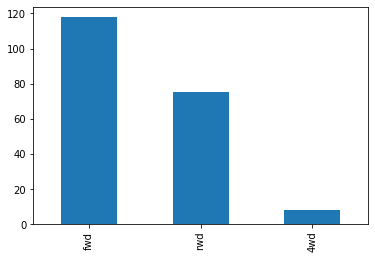

In [171]:
df_eda['drive-wheels'].value_counts().plot.bar()

In [172]:
df['drive-wheels'].isna().sum()
df['drive-wheels'].unique()
df['drive-wheels'].shape
df.shape

(201, 26)

# BOX PLOTS

Box plots are a great way to visualize the numeric data, since you can visualize the various distributions of the data. The main features that the box plot shows:

Median:
Represents where the middle point is.

Quartiles:
UPPER QUARTILE- Shows where the 75th percentile is,
LOWER QUARTILE- Shows where the 25th percentile is,
Inter Quartile Range (IQR)- The data between the UPPER and LOWER Quartiles

Extremes:
LOWER EXTREME- These are calculated as 1.5 times the IQR or Inter Quartile Range, below the 25th percentile.
UPPER EXTREME- These are calculated as 1.5 times the IQR or Inter Quartile Range, above the 75th percentile.

Outliers:
Box Plots also display outliers as individual dots that occur outside the upper and lower extremes.
With Box Plots you can easily spot outliers, and also see the Distribution and Skewness (Measure of the assymetry of a probability distribution or a dataset) of the data.

In [173]:
import seaborn as sns

In [174]:
x = df_eda["drive-wheels"]
y = df_eda["price"]

<Axes: xlabel='drive-wheels', ylabel='price'>

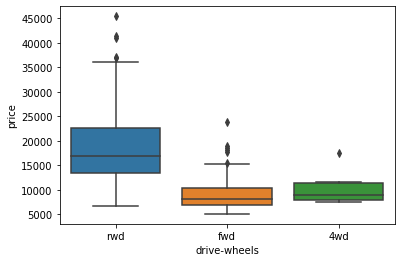

In [175]:
sns.boxplot(x='drive-wheels', y='price', data=df_eda)

 We can see that the distribution of
price between the rear wheel drive, and the other categories are distinct. But the price for front wheel drive and four wheel drive are almost
indistinguishable

# Scatter Plot

This plot shows the relationship between two variables. The predictor variable, is the variable that you are using to predict an outcome. In this case our predictor variable is the engine size. The target variable is the variable that you are trying to predict. In a scatter plot, we typically set
the predictor variable on the x-axis or horizontal axis, and we set the target variable on the y-axis or vertical axis.

Often times we tend to see continuous variables in our data. These data points are numbers contained in some range. For example, in our data set price and engine size are continuous variables.
In this case, our target variable is the price. Since this would be the outcome. 

In [176]:
df_eda.loc[:,['price','engine-size']]

,price,engine-size
0,13495,130
1,16500,130
2,16500,152
3,13950,109
4,17450,136
...,...,...
200,16845,141
201,19045,141
202,21485,173
203,22470,145


In [177]:
import matplotlib.pyplot as plt

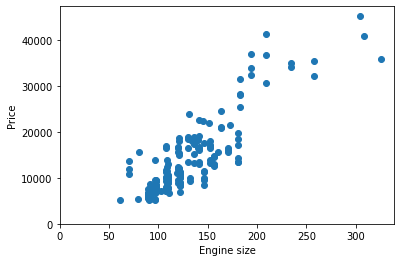

In [178]:
x = df_eda['engine-size']
y = df_eda['price']
plt.scatter(x, y)
plt.ylim(0,)
plt.xlim(0,)

plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()

From the scatter plot,
we see that as the engine size goes up, the price of the car also goes up. This is giving us an initial
indication that there is a positive linear relationship between
these two variables.

.

# Groupby()
### To group the categorical variables

In [179]:
df_test = df_eda[["drive-wheels","body-style","price"]].copy()

In [180]:
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp  # as_index=False give us output with numerical index rather than drive-wheels and body-style as index

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# Pivot()

One variable displayed along the columns and other variable displayed along the rows, just like excel spreadsheet.

In [181]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')

In [182]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [183]:
df_eda.loc[(df_eda['drive-wheels']=='convertible') &(df_eda['price'].isna())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price


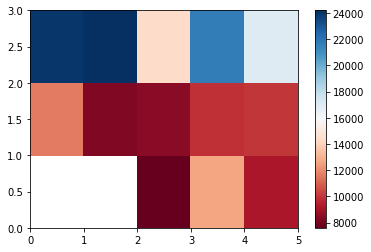

In [184]:
plt.pcolor(df_pivot, cmap='RdBu')  # Here pcolor() is pseudocolor
plt.colorbar()
plt.show()

.

# Correlation

 Correlation is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes how does this affect change in the other variable?

It is important to know that correlation doesn't imply causation. In fact, we can say that umbrella and rain are correlated but we would not have enough information to say whether the umbrella caused the rain or the rain caused the umbrella.

We can use seaborn.regplot to create the scatter plot.

The main goal of this plot is to see whether the engine size has any impact on the price.

In [185]:
df_corr = df[['price','engine-size','highway-mpg','peak-rpm']].copy()

(0.0, 53169.76774047359)

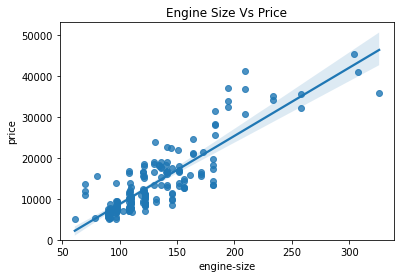

In [186]:
sns.regplot(x='engine-size', y='price', data=df_corr)
plt.title('Engine Size Vs Price')
plt.ylim(0,)

As you can see that the straight line through the data points is very steep which shows that there's a Positive Linear Relationship between the two variables. With increase in values of engine size, values of price go up as well and the slope of the line is positive. So there is a positive correlation between engine size and price.

And this line is called as regression line.

In [187]:
df_corr['peak-rpm'].loc[df_corr['peak-rpm']=='?']
df_corr['peak-rpm'].replace('?',np.nan,inplace=True)

In [188]:
df_corr['peak-rpm'].loc[df_corr['peak-rpm']=='?']

Series([], Name: peak-rpm, dtype: object)

In [189]:
df_corr['peak-rpm']=pd.to_numeric

(0.0, 48177.63761263484)

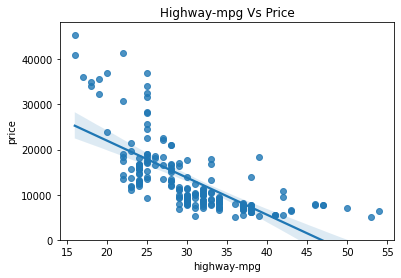

In [190]:
sns.regplot(x='highway-mpg', y='price', data=df_corr)
plt.title('Highway-mpg Vs Price')
plt.ylim(0,)

As we can see there is a Negative Linear Relationship between the highway-mpg and price feature.

As highway-mpg increasing price decreasing

There can be many reasons such as:
Engine Power and Performance- Higher-priced cars often come with more powerful engines that provide better acceleration and performance. These engines typically consume more fuel, resulting in lower fuel efficiency.

Vehicle Size and Weight- Luxury cars or larger vehicles tend to have more features and amenities, which can contribute to their higher price tag. However, these vehicles also tend to be heavier and less aerodynamic, leading to increased fuel consumption and lower fuel efficiency.

In [191]:
df_corr['peak-rpm']=df['peak-rpm'].copy()

In [192]:
# Convert 'peak-rpm' column to numeric type
df_corr['peak-rpm']=pd.to_numeric(df['peak-rpm'], errors='coerce')

 the pd.to_numeric() function is used to convert the 'peak-rpm' column to a numeric data type. The errors='coerce' parameter ensures that any non-numeric values are converted to NaN. 

In [193]:
# Calculate the mean of 'peak-rpm' column and replace NaN values
mean_peak_rpm=df_corr['peak-rpm'].mean()
df_corr['peak-rpm'].fillna(mean_peak_rpm, inplace=True)
df_corr['peak-rpm']=df_corr['peak-rpm'].astype(int)

Text(0.5, 1.0, 'Weak Correlation between Peak rpm and Price')

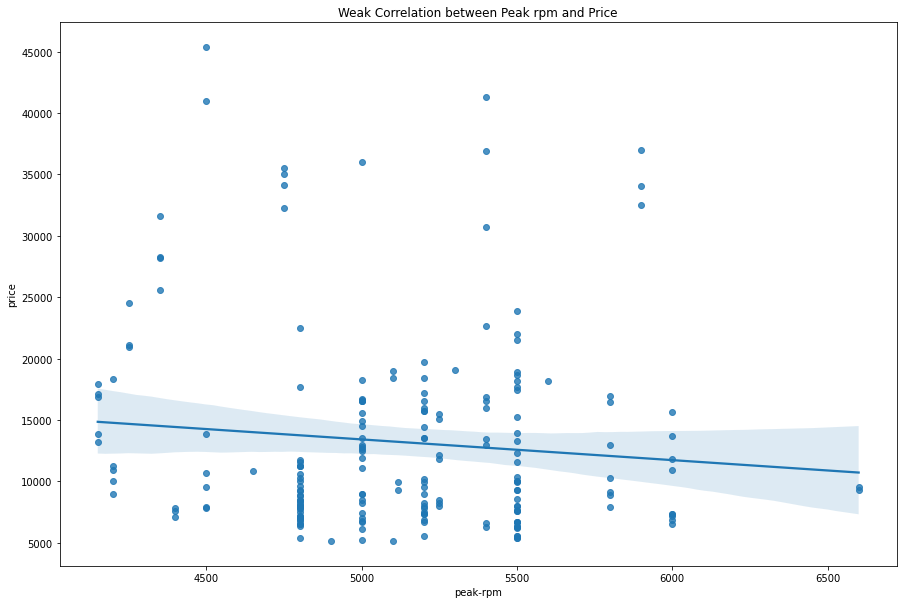

In [194]:
plt.figure(figsize=(15,10))
sns.regplot(x=df_corr['peak-rpm'], y=df_corr['price'])
plt.title('Weak Correlation between Peak rpm and Price')


# Pearson Correlation

One way to measure the STRENGTH of the correlation between continuous numerical variable is by using a method called Pearson correlation. 

Pearson correlation method will give you two values: the Correlation Coefficient and the P-value.
- Correlation Coefficient:  +1(+),  0(No Correlation),  -1(-)
- P-Value: .001(Strong certainty about CC),  .001-.05(Moderate certainty),  .05-.1(Weak certainty), >.1(No certainty at all)

Correlation Coefficient:
A value close to 1 implies a large positive correlation, while a value close to negative 1 implies a large negative correlation, and a value close to zero implies no correlation between the variables.

P-Value: The P-Value will tell us how certain we are about the correlation that we calculated.

A value less than.001 gives us a strong certainty about the correlation coefficient that we calculated. A value between.001 and.05 gives us moderate certainty. A value between.05 and.1 will give us a weak certainty. And a P-value larger than.1 will give us no certainty of correlation at all.

 We can say that there is a strong correlation when the correlation coefficient is close to 1 or negative 1, and the P-value is less than.001.

In [195]:
from scipy import stats

In [196]:
df_corr['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
mean_horsepower = df_corr['horsepower'].mean()
df_corr['horsepower'].fillna(mean_horsepower, inplace=True)

In [197]:
pearsons_coef, p_value= stats.pearsonr(df_corr['horsepower'], df_corr['price'])

In [198]:
pearsons_coef, p_value

(0.8096811975632288, 6.058444649710116e-48)

In [199]:
# 0.0000000000000000000000000000000000000000000000006058444649710002
# "e-48" negative exponentdenotes an extremely small value, close to zero, in scientific notation

So here we can see that the Pearsons Coefficient is closer to 1 and P-Value is closer to zero,
that means there is a Strong Positive Correlation and Certainty of the Correlation Coefficient.

<Axes: xlabel='horsepower', ylabel='price'>

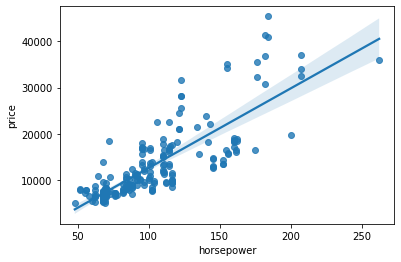

In [200]:
sns.regplot(x=df_corr['horsepower'], y=df_corr['price'])

<Axes: xlabel='horsepower', ylabel='price'>

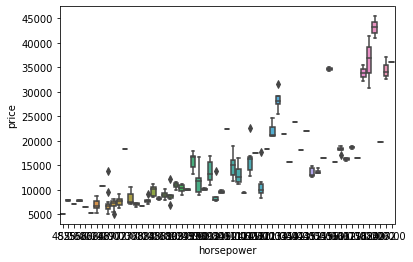

In [201]:
sns.boxplot(x=df_corr['horsepower'],y=df_corr['price'])

Okkay it won't work.😂😂
Box plot is for categorical data that can be grouped together, drive wheels: 3 categories: rwd, fwd, and 4wd

<Axes: xlabel='drive-wheels', ylabel='price'>

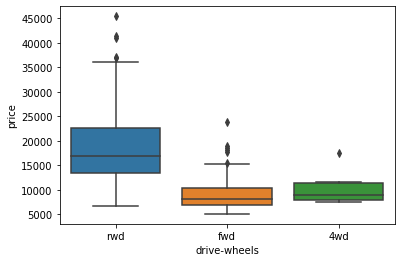

In [202]:
sns.boxplot(x=df['drive-wheels'], y=df_corr['price'])
# Like this😗

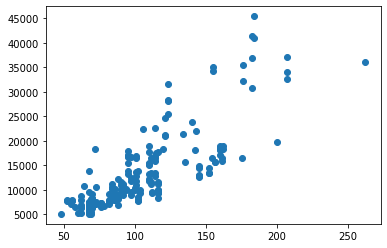

In [203]:
plt.scatter(x=df_corr['horsepower'],y=df_corr['price'])

.

.

# Correlation Heatmap

The seaborn heatmap function excludes missing values from the plot by default. Therefore, if there are NaN values in the correlation matrix, those values will not be displayed in the heatmap.

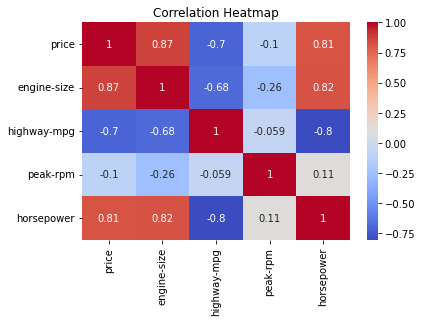

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest from df_corr
columns_of_interest = ['price', 'engine-size', 'highway-mpg', 'peak-rpm', 'horsepower']
corr_matrix = df_corr[columns_of_interest].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Show the plot
plt.show()


So this heatmap is  showing a Strong Positive Correlation between features.

This heatmap indicates the correlation between each of the variables with one another.
The colour scheme indicates the Pearson Correlation Coefficient, indicating the strength of the correlation between two variables.
We can see the diagonal line with red colour, indicating that all the values on this diagonal are highly correlated.

In [205]:
df_corr['horsepower']=df_corr['horsepower'].astype(int)

This code may raise an error if the 'horsepower' column contains non-integer values, 
such as decimal numbers or NaN values. Since the column contains decimal 
values like 103.39698492, using astype(int) directly will result in a 
ValueError because integers cannot represent decimal values.

If you want to convert the 'horsepower' column to an integer data type, you will need to handle any non-integer values first. Depending on your specific requirements, you can either round the decimal values or convert them to the nearest integer. Here's an example using the round() function to round the decimal values:

df_corr['horsepower'] = df_corr['horsepower'].round().astype(int)

In [206]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        201 non-null    int32
 1   engine-size  201 non-null    int64
 2   highway-mpg  201 non-null    int64
 3   peak-rpm     201 non-null    int32
 4   horsepower   201 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 7.1 KB


.

# Relationships Between Two Categorical Variables

When dealing with the relationships between Categorical Variables we can't use the same method for Correlation that we were using for Continuous Variables,
We will have to employ the use of the Chi-Square test for the association.

# Chi-Square Test


The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It is based on the chi-square statistic, which measures the difference between the observed frequencies and the expected frequencies under the assumption of independence between the variables.

Formulate the null hypothesis (H0) and alternative hypothesis (Ha):

H0: There is no association between the variables (independence).

Ha: There is an association between the variables.

Collect the data and create a contingency table, organizing the data into rows and columns based on the categories of the two variables.


Calculate the expected frequencies for each cell under the assumption of independence. The expected frequency for a cell is given by (row total * column total) / grand total.


Calculate the chi-square statistic:


Chi-square statistic = Σ [(Observed frequency - Expected frequency)^2 / Expected frequency] over all cells.

Determine the degrees of freedom (df) for the chi-square test. It is equal to (number of rows - 1) * (number of columns - 1).


Compare the calculated chi-square statistic to the critical value from the chi-square distribution with the appropriate degrees of freedom. This critical value corresponds to the desired level of significance (e.g., 0.05).


If the calculated chi-square statistic is greater than the critical value, reject the null hypothesis. There is evidence of an association between the variables. If the calculated chi-square statistic is less than or equal to the critical value, fail to reject the null hypothesis. There is no significant evidence of an association between the variables.

The critical value from the chi-square distribution table corresponds to the desired level of significance (often denoted as alpha, α). The most commonly used level of significance is 0.05, which corresponds to a 95% confidence level.

And if the significance level we are assuming is 0.01 then the confidence level is 99%.

## We can do all of this in just 2 lines.😌
import scipy.stats as stats

chi2, dof, p, expected_frequencies = stats.chi2_contingency(df)

.

.

.

And we assume Alpha=0.05 for 95% Confidence or 0.01 for 99% Confidence,
So if the p-value is less than the significance level (alpha>p), the Null Hypothesis(H0) is rejected in favour of Alternative Hypothesis(HA),

The significance level acts as a cutoff point for decision-making. If the p-value is smaller than the significance level, researchers reject the null hypothesis and claim evidence of an association. If the p-value is larger, they fail to reject the null hypothesis due to insufficient evidence.

In [207]:
import scipy.stats as stats
import pandas as pd

dataVOTING = {
    'Index': ['Vote A', 'Vote B', 'Vote C'],
    'Male': [40, 50, 30],
    'Female': [30, 80, 20]
}

df_V = pd.DataFrame(dataVOTING)
df_V.set_index('Index', inplace=True)  # Set 'Index' as the index column

# Calculate the total counts for each category
# df['Total'] = df[['Male', 'Female']].sum(axis=1)
# Add the 'Total' row back to the DataFrame
# df.loc['Total'] = df.sum()
# print(df) 

# Calculate the total by summing 'Male' and 'Female' votes for each row
df_V['Total'] = df_V['Male']+df_V['Female']

# Calculate the total count across all cells
total = df_V[['Male','Female']].sum().sum()


observed=df_V.copy()
observed['Male']=df_V['Male']
observed['Female']=df_V['Female']

#Calculate the expected frequencies assuming independence
expected=df_V.copy()
expected['Male']=df_V['Male'].sum()*df_V['Total']/total  # Row_Total*Column_Total/Grand_Total
expected['Female']=df_V['Female'].sum()*df_V['Total']/total
# Here df['Male'].sum() and df['Female'].sum() are the column totals

# Chi-Square Statistic = Sum((observed-expected)**2/expected)
chi2 = ((df_V[['Male','Female']]-expected[['Male','Female']])**2/expected[['Male','Female']]).sum().sum()
chi2
# df.shape
# df.shape[0]
# df.shape[1]-1

num_rows= df_V.shape[0]
num_cols= df_V.shape[1]-1
# print(num_rows," ",num_cols)

degree_of_freedom= (num_rows-1)*(num_cols-1)
degree_of_freedom

chi2, p,dof, expected_frequencies = stats.chi2_contingency(df_V)
print(chi2)
print(p)
print(degree_of_freedom)
print("Expected_Frequency_Table:")
print(pd.DataFrame(expected_frequencies, index=df_V.index, columns=df_V.columns))

9.967596506058044
0.04097706629952236
2
Expected_Frequency_Table:
        Male  Female  Total
Index                      
Vote A  33.6    36.4   70.0
Vote B  62.4    67.6  130.0
Vote C  24.0    26.0   50.0


In [208]:
alpha = 0.05
if p<alpha:
    print('Rejects Null Hypothesis')
else:
    print('Fail To Reject The Null Hypothesis')

Rejects Null Hypothesis


There is an association between Voting Preference and Genders🤣

The context of this analysis would typically be a study or survey examining the voting preferences of individuals belonging to different genders. The goal is to determine whether there is a relationship between gender and voting choices. The rejection of the null hypothesis indicates that gender does play a role in influencing voting preferences. This finding could have implications in understanding political behavior, voter demographics, and identifying potential factors that influence voting decisions.

It's important to note that statistical tests like the chi-square test provide evidence of association but do not establish causation. The analysis suggests that there is a significant relationship between voting preference and gender, but further research and analysis may be needed to understand the nature and underlying factors of this association.

### Description:

chi2: It represents the chi-square test statistic. This value measures the discrepancy between the observed frequencies and the expected frequencies in the contingency table. A higher chi-square value indicates a greater difference between the observed and expected frequencies, suggesting a potential association between the variables.

p: It refers to the p-value associated with the chi-square test. The p-value indicates the probability of observing the data (or more extreme data) under the assumption that there is no association between the variables. A smaller p-value suggests stronger evidence against the null hypothesis of independence, implying a significant association between the variables.

dof: It stands for degrees of freedom. In the context of the chi-square test, degrees of freedom represent the number of independent pieces of information available for estimating the expected frequencies. For a contingency table with r rows and c columns, the degrees of freedom can be calculated as (r-1) * (c-1).

.

.

.

In [274]:
df_corr['city-L/100km'] = df['city-L/100km'].copy()

In [275]:
df_md = df_corr.copy()

# Model Development

A model or estimator can be thought of as a mathematical equation used to predict the value given one or more other values. Relating one or more independent variables or features to dependent variables.

Sigle Independent Variable:
You input a car model's highway miles per gallon as the independent variable or feature, the output of the model or dependent variable is the price. Usually, the more relevant data you have, the more accurate your model is.

Multiple Independent Variable:
You input multiple independent variables or features to your model. Therefore, your model may predict a more accurate price for the car.

Why need more data?

You have two almost identical cars. Pink cars sell for significantly less.
You want to use your model to determine the price of two cars, one pink, one red. If your models independent variables or features do not include color, your model will predict the same price for cars that may sell for much less. In addition to getting more data, you can try different types of models.

.

# Linear Regression

### Linear regression refers to one independent variable to make a prediction. 
### Multiple linear regression refers to multiple independent variables to make a prediction.

Simple linear regression or SLR is a method to help us understand the relationship between two variables. The predictor independent variable x and the target dependent variable y.

#### Intercept & Slope: b0 and b1

The intercept(b0) represents the starting point or baseline value of the dependent variable(Y), while the slope(b1) indicates the rate of change in the dependent variable(Y) for each unit change in the independent variable(X).

These are attributes of the LinearRegression model object:
lm = LinearRegression()

Intercept: The intercept, also known as the y-intercept or the constant term, represents the value of the dependent variable (y) when all independent variables (x) are set to zero. It is the point where the regression line intersects the y-axis. The intercept is denoted by the symbol "b0" in a simple linear regression model.

intercept= lm.intercept_

Slope: The slope represents the change in the dependent variable (y) for a one-unit change in the independent variable (x). It quantifies the relationship and direction between the independent and dependent variables. In a simple linear regression model, the slope is denoted by the symbol "b1" and indicates the steepness or inclination of the regression line.

slope.coefficient= lm.coef_

# Simple Linear Regression

### Process

We have a set of training points. We use these training points to fit or train the model and get parameters. We then use these parameters in the model. We now have a model. We use the hat on the y to denote the model is an estimate. We can use this model to predict values that we haven't seen.

Our model is not always correct😒

#### Fitting a Simple Linear Model Estimator

In [209]:
# import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

In [210]:
lm = LinearRegression() # Create a linear regression object(lm) using a constructor

In [280]:
# We define a predictor(X) and target variable(Y) 
X = df_md[['highway-mpg']]
Y = df_md['price']

In [281]:
# Use lm.fit(X,Y) to fit the model, i.e., find the parameter b0 and b1
lm.fit(X, Y)

LinearRegression()

In [287]:
# We can obtain the prediction
Yhat=lm.predict(X)
Yhat

# Yhat_df= pd.DataFrame(Yhat)
# Yhat_df

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [289]:
#The attributes of linear regression model object lm are b0 and b1:

b0=lm.intercept_
print('Intercept(b0):',b0)

b1=lm.coef_
print('Slope(b1):',b1)

Intercept(b0): 38423.3058581574
Slope(b1): [-821.73337832]


In [291]:
# The relationship between the Price and Highway MPG is given by:
# Yhat = b0+b1x
Price = b0+b1*X
Price

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
200,15414.771265
201,17879.971400
202,19523.438157
203,16236.504643


The intercept represents the estimated price of a car when the highway mpg is zero. In this case, the intercept is approximately 38,423.31 units of currency (it's not specified in the code which currency is used). This intercept value provides a baseline starting point for the price estimation.

The slope represents the estimated change in price for each one-unit increase in the highway mpg. In this case, the slope is approximately -821.73, indicating that as the highway mpg increases, the price of the car tends to decrease. The negative sign of the slope indicates an inverse relationship between price and highway mpg.

Here Intercept(b0) or baseline of Y(price) is 38423.30581574

Slope(b1) indicating that for each unit change in Highway-mpg the price is reducing(-821.73337832)

KeyError: 'city-L/100km'

In [212]:
price22ndrow=df2.loc[22,'price']
price22ndrow = pd.DataFrame({'price': [price22ndrow]})
price22ndrow

NameError: name 'df2' is not defined

In [ ]:
df2.isna().sum()

In [ ]:
df2.nunique().to_frame()

In [ ]:
df2[df=="?"].count().sum() # These are the missing values 

In [ ]:
import numpy as np

In [ ]:
df2.replace("?",np.nan,inplace=True)

In [ ]:
df2[df2=="?"].count().sum()

In [ ]:
df2.isnull().sum()
df2.isna().sum().sum()

.

.

In [ ]:
df2.shape

.

# Data Formatting

- Data are usually collected from different sources and stored in different formats.
- Bringing data into a common standard of expression allows users to make meaningful comparison.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
{
    "city": ['NY','New York','N.Y.','N.Y.']
}
)

In [ ]:
df

Non-formatted:
    confusing,
    hard to aggregate,
    hard to compare

In [ ]:
# Create a sample DataFrame
data = {'city': ['NY', 'New York', 'N.Y.', 'N.Y.']}
df = pd.DataFrame(data)

# Clean and standardize the 'city' column
df['city'] = df['city'].str.replace('[^a-zA-Z\s]', '',regex=True)  # Remove non-alphabetic characters
df['city'] = df['city'].str.strip()  # Remove leading and trailing whitespaces
df['city'] = df['city'].str.title()  # Capitalize the first letter of each word

# Print the cleaned DataFrame
print(df)

In [ ]:
df

In [ ]:
df['city'] = df['city'].str.lower()  # Convert all values to lowercase

In [ ]:
df['city']=df['city'].str.upper()

In [ ]:
headers = ['city']
df.columns = headers
df

In [ ]:
dataCars={'city-mpg':[21, 21, 19]}
df2 = pd.DataFrame(dataCars)

In [ ]:
df2

In [ ]:
# Now we have to convert them into L/100 km
# 235/city-mpg

In [ ]:
df2['city-mpg']=235/df2['city-mpg']

In [ ]:
df2

In [ ]:
df2['city-mpg']=df2['city-mpg'].round(1)

In [ ]:
df2

In [ ]:
df2['city-mpg'].dtypes
# We can change the data types with: astype(int/hdhosl)

.

.

In [ ]:
dataNorm={'length':[168.8, 168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7],
         'width':[64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4],
         'height':[48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9],
         'index':[1,2,3,4,5,6,7,8,9]}
dfNORM = pd.DataFrame(dataNorm)

In [ ]:
# Uniform features with different range
# dfNORM=dfNORM.drop("index",axis=1)
del dfNORM['index']

In [ ]:
dfNORM

An important technique to understand in data pre-processing. When we take a look at the used car data set, we notice in the data that the feature length ranges from 150-250, while feature width and height ranges from 50-100.

By  making the ranges consistent between variables, normalization enables a fair comparison between the different features, making sure they have the same impact. It is also important for computational reasons.

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df = pd.read_csv(url, header=None)

df.columns = headers

df.head()


It shows the mean, the total number of
data points, the standard deviation, the quartiles and the extreme values. Any NAN values are automatically
skipped in these statistics.
This function will give you a clear idea
of the distribution of your different variables.

In [ ]:
df.describe()

.

You could have also categorical
variables in your data set. These are variables that can be divided up
into different categories or groups, and have discrete values. For example, in our data set we have the drive system as a categorical variable, which consists of the categories,
forward wheel drive, rear wheel drive and four wheel drive. One way you can summarize
the categorical data, is by using the function value_counts.

In [ ]:
df.value_counts().to_frame()

.

We can change the name of the column
to make it easier to read. We see that we have 120 cars in
the front wheel drive category. 76 cars in the rear wheel drive category,
and 9 cars in the four wheel drive category.

In [ ]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()

# Rename the column
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)

# Display the DataFrame
print(drive_wheels_counts)

.

# BOX PLOTS

In [ ]:
df2=df.copy()

In [ ]:
sns.boxplot(x="drive-wheels", y="price",data=df2)

In [ ]:
df2["drive-wheels"]

In [ ]:
df2['price'] = pd.to_numeric(df2['price'],errors='coerce')


In [ ]:
df2.info()
df2['price']

In [ ]:
df2.to_csv(r"D:\Analytics\IBM DA COURSERA\Datasets\cardata.csv")

In [ ]:
df2['normalized-losses'] = pd.to_numeric(df2['normalized-losses'])

In [ ]:
df2['normalized-losses'].

In [ ]:
df2 = df.copy()

# SIMPLE LINEAR MODEL ESTIMATOR

X: PREDICTOR OR INDEPENDENT VARIABLE --REGRESSOR
Y: TARGET OR DEPENDENT VARIABLE
Yhat = ESTIMATED/PREDICTED/FITTED VALUE 

Import linear_model from sci-kit learn:

In [ ]:
from sklearn.linear_model import LinearRegression

Create a Linear Regression Object using the constructor:

In [ ]:
lm = LinearRegression()

FITTING A SIMPLE LINEAR REGRESSION MODEL

We define the predictor variable and target variable

In [ ]:
X = df2['highway-mpg']
Y = df2['price']

Then use lm.fit(X,Y) to fit the model, i.e., find the parameters b0 and b1

b0 = Intercept,
b1 = Slope/Coefficient

--Both b0 and b1 are the attributes of object(lm)

In [ ]:
convert = 235/X

In [ ]:
Y.isna().sum()
Y.dropna()

In [ ]:
empty_rows = X.index[~X.index.isin(Y.index)]

In [ ]:
empty_rows

In [ ]:
X.drop([9, 44, 45, 129], axis=0, inplace=True)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X.dtype

In [ ]:
Y.replace('?', np.nan,inplace=True)

In [ ]:
Y = pd.to_numeric(Y)

In [ ]:
Y.isna().sum()

In [ ]:
lm.fit(X.values.reshape(-1,1),Y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an object/instance of LinearRegression model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X.values.reshape(-1,1),Y)

In [ ]:
intercept = lm.intercept_
intercept

In [ ]:
slope = lm.coef_
slope

In [ ]:
b0 = intercept # attribute of LinearRegression model's object
b1 = slope     # another attribute of LinearRegression model's object

In [ ]:
Yhat = b0 + b1*X
Yhat.head()

In [ ]:
Y.head()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(Y, Yhat)

In [ ]:
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

In [ ]:
# Calculate the R-Squared(R2) score
r2 = r2_score(Y,Yhat)

In [ ]:
mse

In [ ]:
rmse

In [ ]:
r2

Lower MSE and RMSE values indicate better predictions, while a higher R2 score indicates a better fit of the model to the data.

Mean Squared Error (MSE): The MSE value is approximately 31635042.944639888. This metric measures the average squared difference between the predicted values (Yhat) and the actual values (Y). A higher MSE value indicates a larger prediction error.



Root Mean Squared Error (RMSE): The RMSE value is approximately 5624.503795415191. It is the square root of the MSE and provides a measure of the average prediction error. The RMSE value indicates the average difference between the predicted values and the actual values. A lower RMSE value indicates a better fit of the model.

R-squared (R2) Score: The R2 score is approximately 0.4965911884339176. This score represents the proportion of variance in the dependent variable (Y) that is explained by the independent variable(s) (X). An R2 score closer to 1 indicates a better fit of the model to the data, while a score closer to 0 suggests that the model does not explain much of the variance in the data.

